In [ ]:
"""
(1) Classificação com Regressão Logística

Implemente um modelo de Regressão Logística para classificar o conjunto de dados
Iris (ou qualquer outro). Avalie o modelo utilizando a métrica de acurácia e a matriz de
confusão.
__________________________________________________________________________________________

(1) Classification with Logistic Regression

Implement a Logistic Regression model to classify the Iris dataset (or any other dataset).
Evaluate the model using accuracy metrics and the confusion matrix.

""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
iris_data = pd.read_csv("iris.csv", encoding="utf-8")

# Shows information about the dataset,
# like number_of_samples, number_of_columns,
# and column_data_type
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# There's also the '.shape' command which will print out a tuple
# with the amount of lines and columns the dataset has

print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
# PRE-PROCESSING:
# The 'species' column needs to be turned from string value
# to numeric value, using LabelEncoder

le = LabelEncoder()
iris_data['species_numeric'] = le.fit_transform(iris_data['species'])
list(le.classes_)

['setosa', 'versicolor', 'virginica']

In [ ]:
# This deletes the column with the string values from the dataset
numeric_data = iris_data.drop(columns=['species']).select_dtypes(include=[np.number])

print(numeric_data)

     sepal_length  sepal_width  petal_length  petal_width  species_numeric
0             5.1          3.5           1.4          0.2                0
1             4.9          3.0           1.4          0.2                0
2             4.7          3.2           1.3          0.2                0
3             4.6          3.1           1.5          0.2                0
4             5.0          3.6           1.4          0.2                0
..            ...          ...           ...          ...              ...
145           6.7          3.0           5.2          2.3                2
146           6.3          2.5           5.0          1.9                2
147           6.5          3.0           5.2          2.0                2
148           6.2          3.4           5.4          2.3                2
149           5.9          3.0           5.1          1.8                2

[150 rows x 5 columns]


In [ ]:
# Defining the columns that are studied to make the classification
training_data = np.array(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Defining the classification column
classification_data = np.array(iris_data['species_numeric'])

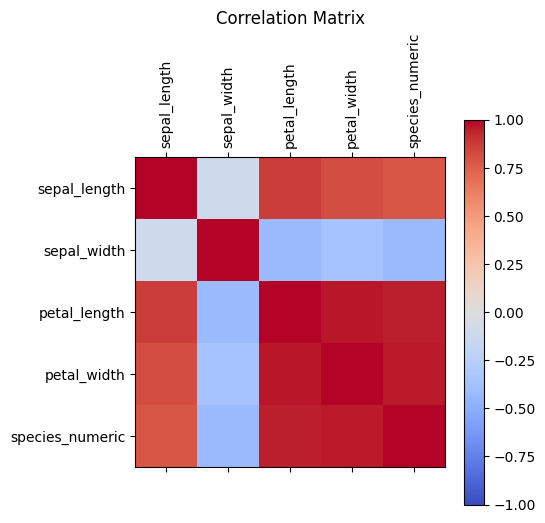

In [ ]:
# Now we can print a correlation matrix
def plot_corr(iris_data, size=5):
    corr = iris_data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Correlation Matrix')
    plt.show()

plot_corr(numeric_data)

In [ ]:
# Splitting the data into the training(70%) and validation(30%) sets
x_train, x_val, y_train, y_val = train_test_split(training_data, classification_data, test_size=0.30)

# x_train: Features for the training set. This is the portion of your data that will be used to train the model.

# x_val: Features for the validation set. This is the portion of your data that will be used to
  # evaluate the model's performance during training, helping to tune hyperparameters and avoid overfitting.

# y_train: Target values for the training set. These are the labels or outcomes corresponding
  # to x_train, used to train the model.

# y_val: Target values for the validation set. These are the labels or outcomes corresponding
  # to x_val, used to assess the model's performance on the validation set.

In [ ]:
print("{0:0.2f}% in the training set".format((len(x_train)/len(iris_data.index)) * 100))
print("{0:0.2f}% int the validation set".format((len(x_val)/len(iris_data.index)) * 100))

70.00% in the training set
30.00% int the validation set


In [ ]:
# Initializing the Logistic Regression algorithm
model = LogisticRegression(max_iter=200)

# Training
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Making the predictions for the validation set
y_pred_val = model.predict(x_val)

In [ ]:
# MEASURING MODEL ACCURACY

print("MODEL ACCURACY SCORE:")
print(accuracy_score(y_val, y_pred_val))

MODEL ACCURACY SCORE:
0.9333333333333333


In [ ]:
# CREATING CONFUSION MATRIX

conf_matrix = confusion_matrix(y_val, y_pred_val)
print("MODEL CONFUSION MATRIX:")
print(conf_matrix)

MODEL CONFUSION MATRIX:
[[13  0  0]
 [ 0 11  0]
 [ 0  3 18]]
